In [1]:
import pandas as pd
import scipy
import numpy as np

In [8]:
train_expertise = np.load('./preprocessed/collaborative_input/expertise.npy')
test_expertise = np.load('./preprocessed/collaborative_input/test_expertise.npy')

In [3]:
train_sample = pd.read_pickle('./preprocessed/collaborative_input/train_sample.pkl')

In [4]:
test_sample = pd.read_pickle('./preprocessed/collaborative_input/test_sample.pkl')

In [12]:
train_sample['expertise'] = train_expertise
test_sample['expertise'] = test_expertise

In [17]:
train_sample.head(2)

,reviewerID,movieID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewer_count,expertise
0,A1127LKNR08JJK,630174411X,acwpython@juno.com,"[0, 4]",The movie was ok but it did lack a few things....,4.0,GREAT,879379200,1997-11-13,0,0.000265
1,A1127LKNR08JJK,0767824571,acwpython@juno.com,"[0, 0]","This movie rules. It has humor, love, suspens...",5.0,Best Movie Ever!!!,879465600,1997-11-14,1,0.000334


In [18]:
test_sample.head(2)

,reviewerID,movieID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewer_count,expertise
0,A1127LKNR08JJK,6302952727,acwpython@juno.com,"[2, 51]",THis is the shortest movie but the funniest. ...,5.0,no,879897600,1997-11-19,5,0.000137
1,A1127LKNR08JJK,6300248526,acwpython@juno.com,"[0, 4]",This is one of the greatest shows i have ever ...,5.0,why do we have to fill this out?,879897600,1997-11-19,6,0.000085


In [19]:
train_sample

,reviewerID,movieID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewer_count,expertise
0,A1127LKNR08JJK,630174411X,acwpython@juno.com,"[0, 4]",The movie was ok but it did lack a few things....,4.0,GREAT,879379200,1997-11-13,0,0.000265
1,A1127LKNR08JJK,0767824571,acwpython@juno.com,"[0, 0]","This movie rules. It has humor, love, suspens...",5.0,Best Movie Ever!!!,879465600,1997-11-14,1,0.000334
2,A1127LKNR08JJK,0783222068,acwpython@juno.com,"[0, 0]",HA HA HA!!! THose were the first words anyone ...,5.0,Hilarious,879465600,1997-11-14,2,0.000523
3,A1127LKNR08JJK,0780022181,acwpython@juno.com,"[1, 2]",This is one of the best movies in the world. ...,5.0,This should get a 15,879897600,1997-11-19,3,0.000151
4,A1127LKNR08JJK,6303094880,acwpython@juno.com,"[2, 3]",This is so funny. It has a lot of good jokes ...,5.0,Awesome,879897600,1997-11-19,4,0.000152
...,...,...,...,...,...,...,...,...,...,...,...
99995,A9TARC4EV6EXK,B0000C2IVA,"antistat ""kensboy""","[6, 7]",This wonderful near miss of a movie was terrib...,5.0,Ayanna will slice your soul,1122336000,2005-07-26,2,0.008179
99996,A1ART5LIGLOVZO,B0000B1OC4,"Chris ""Metal Reviewer""","[4, 10]","Actually, it is extremely hard to find a good ...",3.0,A Very Biased Opinion of the Fast Food Industr...,1122336000,2005-07-26,4,0.010561
99997,A1ZJBZYI14PR9B,B0009B16TE,Ginny Strobl,"[4, 6]",The quality of the DVD and the series is excep...,5.0,Bewitched-The Complete First Season,1122336000,2005-07-26,0,0.000092
99998,A1AVXIRWZ87MZM,0790731002,"Darth Vader 9000 ""Crazy Guy""","[3, 4]",Forget about what everone elese said this film...,5.0,''WHO IS BATMAN?'',1122336000,2005-07-26,3,0.000315


In [47]:
from sklearn.preprocessing import OneHotEncoder
from fastFM import als
import scipy.sparse
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [44]:
y_train = train_sample['overall'].to_numpy()
y_test = test_sample['overall'].to_numpy()

In [21]:
enc = OneHotEncoder(handle_unknown='ignore')
X_1_train = enc.fit_transform(train_sample[['reviewerID','movieID']])
X_1_test = enc.transform(test_sample[['reviewerID','movieID']])

In [28]:
assert X_1_train.shape[1] == len(train_sample['reviewerID'].unique())+len(train_sample['movieID'].unique())

In [32]:
#X_2_train = train_sample[['reviewer_count','expertise']].to_numpy()
#X_2_test = test_sample[['reviewer_count','expertise']].to_numpy()

sparse_X_2_train = scipy.sparse.csr_matrix(X_2_train)
sparse_X_2_test = scipy.sparse.csr_matrix(X_2_test)


In [43]:
#X_train = scipy.sparse.hstack([X_1_train,sparse_X_2_train],format='csr')
#X_test = scipy.sparse.hstack([X_1_test,sparse_X_2_test],format='csr')

In [66]:
X_train = X_1_train
X_test = X_1_test

In [67]:
n_iter = 50
step_size = 1
l2_reg_w = 0
l2_reg_V = 0

In [68]:
fm = als.FMRegression(n_iter=0, l2_reg_w=0.1, l2_reg_V=0.1, rank=4)

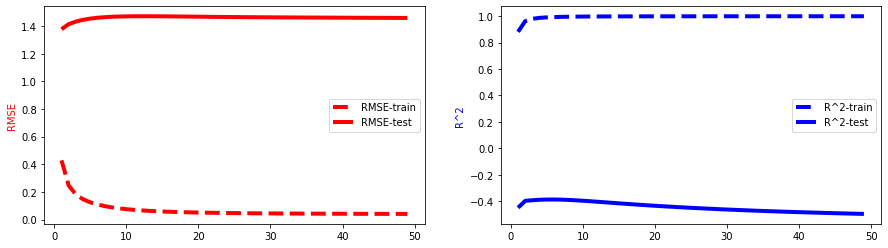

In [69]:
fm.fit(X_train, y_train)

rmse_train = []
rmse_test = []
r2_score_train = []
r2_score_test = []

for i in range(1, n_iter):
    fm.fit(X_train, y_train, n_more_iter=step_size)
    y_pred = fm.predict(X_test)

    rmse_train.append(np.sqrt(mean_squared_error(fm.predict(X_train), y_train)))
    rmse_test.append(np.sqrt(mean_squared_error(fm.predict(X_test), y_test)))

    r2_score_train.append(r2_score(fm.predict(X_train), y_train))
    r2_score_test.append(r2_score(fm.predict(X_test), y_test))


from matplotlib import pyplot as plt
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))

x = np.arange(1, n_iter) * step_size
with plt.style.context('fivethirtyeight'):
    axes[0].plot(x, rmse_train, label='RMSE-train', color='r', ls="--")
    axes[0].plot(x, rmse_test, label='RMSE-test', color='r')
    axes[1].plot(x, r2_score_train, label='R^2-train', color='b', ls="--")
    axes[1].plot(x, r2_score_test, label='R^2-test', color='b')
axes[0].set_ylabel('RMSE', color='r')
axes[1].set_ylabel('R^2', color='b')
axes[0].legend()
axes[1].legend()

In [71]:
predictions = fm.predict(X_train)
predictions

array([4.05977449, 5.00180449, 4.9620057 , ..., 4.98648552, 4.97370151,
       3.99824193])

In [72]:
train_sample['overall']

0        4.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
99995    5.0
99996    3.0
99997    5.0
99998    5.0
99999    4.0
Name: overall, Length: 100000, dtype: float64

In [73]:
test_sample.tail(3)

,reviewerID,movieID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewer_count,expertise
19997,A1345VRK5MYG7,6301442962,James L.,"[6, 7]","Oddly enough, I never saw this film as a child...",5.0,No Room For Cynics,974505600,2000-11-18,120,0.049461
19998,A24DBUIAWDQXA2,B00004Z4VI,S. C. Smith,"[11, 11]",I had a smile on my face a mile wide throughou...,5.0,A smile a mile wide.,974505600,2000-11-18,9,0.000114
19999,A1TDC511IET8A2,6305426678,Sashie,"[1, 2]","I realy liked this movie, even though the basi...",5.0,i could watch it over and over,974505600,2000-11-18,6,0.000115


In [74]:
preds = fm.predict(X_test)
preds

array([3.81515849, 4.72100454, 4.40618943, ..., 4.83627052, 4.5787194 ,
       1.16292413])